In [2]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("Fraud.csv")
print(data.head())
print(data.shape)

   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  
(6362620, 11)


In [3]:
# Feature Engineering
print("\nFeature Engineering:")
data['hour'] = data['step'] % 24
data['origin_delta'] = data['oldbalanceOrg'] - data['newbalanceOrig']
data['dest_delta'] = data['newbalanceDest'] - data['oldbalanceDest']
data['zeroed_account'] = (data['newbalanceOrig'] == 0).astype(int)
data['large_transaction'] = (data['amount'] > 200000).astype(int)
data = data.drop(['step','oldbalanceOrg','newbalanceOrig','newbalanceDest','oldbalanceDest'],axis=1)



Feature Engineering:


## data exploration

In [4]:
#checking the datatype
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column             Dtype  
---  ------             -----  
 0   type               object 
 1   amount             float64
 2   nameOrig           object 
 3   nameDest           object 
 4   isFraud            int64  
 5   isFlaggedFraud     int64  
 6   hour               int64  
 7   origin_delta       float64
 8   dest_delta         float64
 9   zeroed_account     int64  
 10  large_transaction  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 534.0+ MB


In [5]:
#checking for missing value
data.isnull().sum()

type                 0
amount               0
nameOrig             0
nameDest             0
isFraud              0
isFlaggedFraud       0
hour                 0
origin_delta         0
dest_delta           0
zeroed_account       0
large_transaction    0
dtype: int64

In [6]:
data.apply(lambda x: len(x.unique()))

type                       5
amount               5316900
nameOrig             6353307
nameDest             2722362
isFraud                    2
isFlaggedFraud             2
hour                      24
origin_delta         2962285
dest_delta           4011056
zeroed_account             2
large_transaction          2
dtype: int64

In [7]:
#removing the feature is object datatype and hv lots of unique values
data = data.drop(["nameOrig","nameDest"],axis=1)

In [8]:
#hot-encoding on object type feature is few unique values
data = pd.get_dummies(data, columns=['type'], drop_first=True).astype(int)

isFraud
0    6354407
1       8213
Name: count, dtype: int64


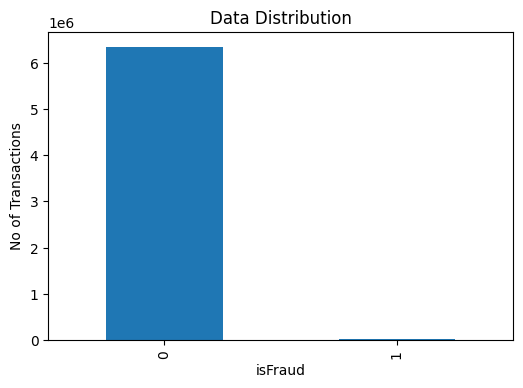

In [9]:
 #checking data is balance or not
print(data['isFraud'].value_counts())
plt.figure(figsize=(6, 4))
data['isFraud'].value_counts().plot(kind='bar')
plt.title("Data Distribution")
plt.ylabel('No of Transactions')
plt.show()

In [10]:
import numpy as np
data.astype(np.float32)

,amount,isFraud,isFlaggedFraud,hour,origin_delta,dest_delta,zeroed_account,large_transaction,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,9839.0,0.0,0.0,1.0,9839.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1864.0,0.0,0.0,1.0,1864.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,181.0,1.0,0.0,1.0,181.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,181.0,1.0,0.0,1.0,181.0,-21182.0,1.0,0.0,1.0,0.0,0.0,0.0
4,11668.0,0.0,0.0,1.0,11668.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,339682.0,1.0,0.0,23.0,339682.0,339682.0,1.0,1.0,1.0,0.0,0.0,0.0
6362616,6311409.0,1.0,0.0,23.0,6311409.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
6362617,6311409.0,1.0,0.0,23.0,6311409.0,6311409.0,1.0,1.0,1.0,0.0,0.0,0.0
6362618,850002.0,1.0,0.0,23.0,850002.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0


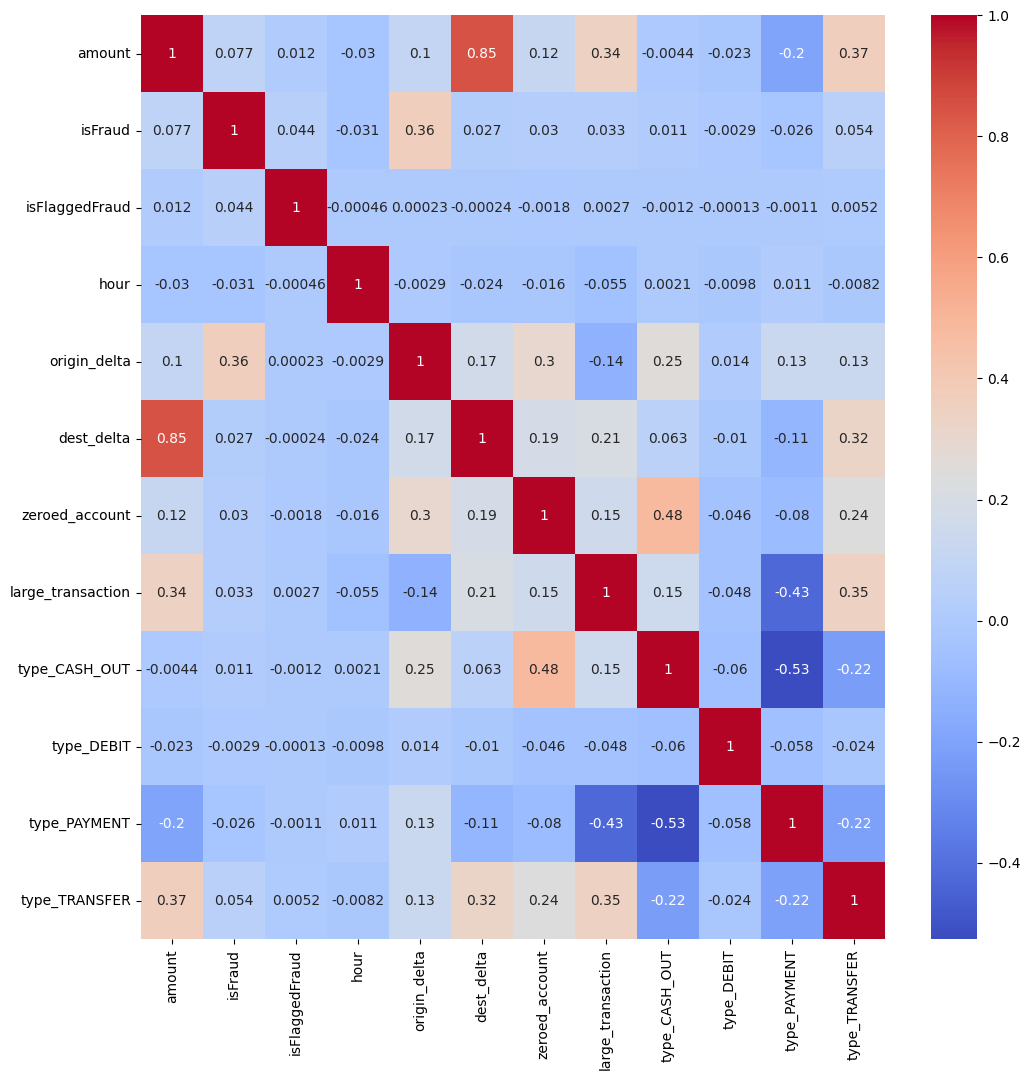

In [11]:
#finding correlation
import seaborn as sns
corr_matrix = data.corr()
plt.figure(figsize= (12,12))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')
plt.show()

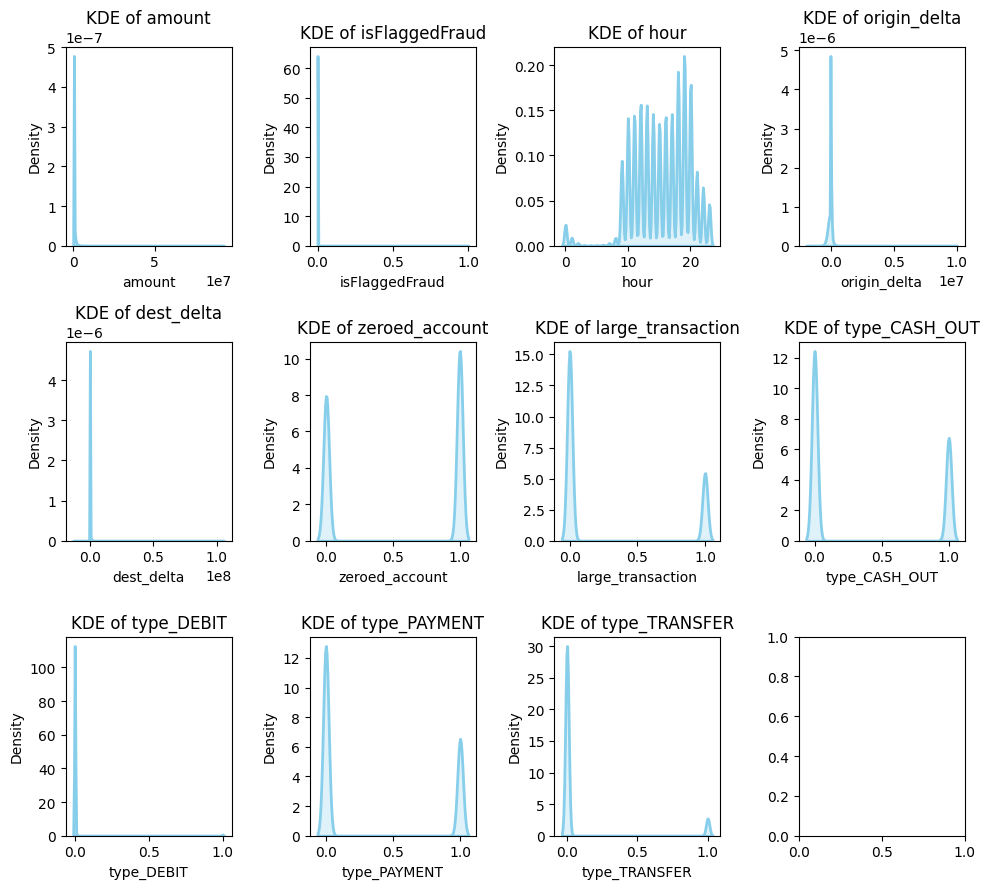

In [12]:
import math

# Drop target if not needed in KDE
features = data.drop(columns=['isFraud'])

# Set layout
num_cols = 4
num_features = len(features.columns)
num_rows = math.ceil(num_features / num_cols)

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 3 * num_rows))
axes = axes.flatten()

# Plot KDE for each feature
for i, column in enumerate(features.columns):
    sns.kdeplot(data[column], fill=True, ax=axes[i], color='skyblue', linewidth=2)
    axes[i].set_title(f'KDE of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Density')

plt.tight_layout()
plt.show()


## Handling Imbalance in Model Training

In [13]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
#split the data
X = data.drop('isFraud', axis=1)
Y = data['isFraud']
X_train ,X_test,Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
# XGBoost with class weighting
xgb = XGBClassifier(
    scale_pos_weight=6354407/8213,  # Adjust for imbalance
    eval_metric='aucpr',  # Optimize for Precision-Recall
    subsample=0.8,
    colsample_bytree=0.8
)
xgb.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='aucpr', feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [14]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(
    class_weight="balanced_subsample",
    n_estimators=150,
    max_depth=12,
    min_samples_leaf=3,
    max_features='sqrt',
    random_state=42,
    n_jobs= -1
)
rf.fit(X_train, Y_train)
y_pred = rf.predict(X_test)

In [15]:

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00   1270904
           1       0.16      0.99      0.28      1620

    accuracy                           0.99   1272524
   macro avg       0.58      0.99      0.64   1272524
weighted avg       1.00      0.99      1.00   1272524

[[1262657    8247]
 [     18    1602]]


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Parameter grid
param_dist = {
    "n_estimators": [100, 150, 200],
    "max_depth": [10,12,14],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 3, 4],
    "max_features": ['sqrt', 'log2'],
    "class_weight": ['balanced', 'balanced_subsample']
}

# Base model
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

# Randomized Search
rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=5,  # Number of parameter settings sampled
    scoring='average_precision',  # Since you're working on imbalanced data
    cv=2,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit
rf_random.fit(X_train, Y_train)

# Best parameters
print("Best Parameters:\n", rf_random.best_params_)

# Best model
best_rf = rf_random.best_estimator_

# Predict
y_pred = best_rf.predict(X_test)


Fitting 2 folds for each of 5 candidates, totalling 10 fits


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))